In [1]:
#Start C5T3 step 4 - classification Credit One Data Set
#numpy,pandas,scipy,math,matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#Estimators
from sklearn.neighbors import NearestNeighbors
from sklearn import tree
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Model Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

#Cross Validation
from sklearn.cross_validation import train_test_split

C:\Users\User\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Get raw data set Credit Card
rawData = pd.read_csv('default of credit card clients.csv', header=1)
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
#Examine the structure of the data set 
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
DEFAULT      30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


In [4]:
#import seaborn for EDA plot
import seaborn as sns

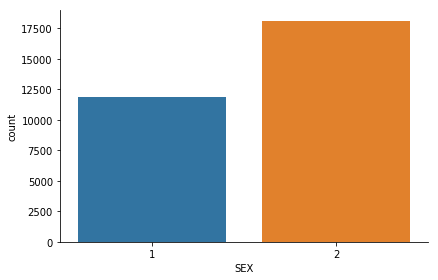

In [5]:
#Instead of group by use seaborn to plot EDUCATION LEVELS BY SEX
fg = sns.factorplot('SEX', data=rawData, kind='count', aspect=1.5)

C:\Users\User\Anaconda3\lib\site-packages\seaborn\categorical.py:1516: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level


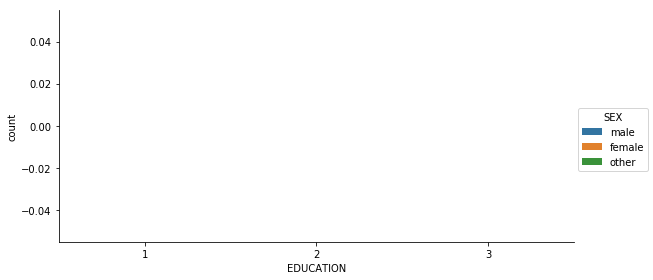

In [8]:
#Lets do a factorplot of clients splitted into SEX, EDUCATION and MARRIAGE
sns.factorplot('EDUCATION', data=rawData, kind='count', hue='SEX', order=[1,2,3], 
               hue_order=['male','female','other'], aspect=2)

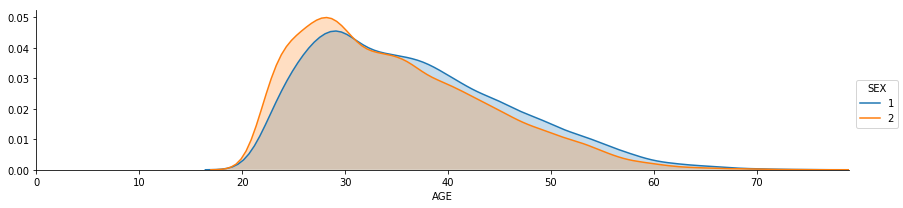

In [9]:
#another version of sns.kdeplot
fig = sns.FacetGrid(rawData, hue='SEX', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = rawData['AGE'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [10]:
#Select Features
#features - start at 0 column
features = rawData.iloc[:,1:24]
print('Summary of feature sample')
features.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [11]:
#Select the dependent variable - not needed with classification
#dependent variable
depVar = rawData['DEFAULT']

In [12]:
#Set up a 70/30 train test split of the dataset using sklearn.cross_validation
X_train, X_test, y_train, y_test = train_test_split(features,depVar,test_size=0.30,random_state=15)
X_train.shape, X_test.shape

((21000, 23), (9000, 23))

In [12]:
#Establish variables that will be used for defining each classification model - correct svm to svm.SVC()
#modelNN = NearestNeighbors()
#modelTR = tree.DecisionTreeClassifier()
#modelSVM = svm.SVC()
#modelSGD = SGDClassifier()
#modelGBC = GradientBoostingClassifier()

In [13]:
#Validate the correct column is being used as the dependent variable
#dependent variable
print(depVar)

0        1
1        1
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       1
14       0
15       0
16       1
17       0
18       0
19       0
20       0
21       1
22       1
23       1
24       0
25       0
26       1
27       0
28       0
29       0
        ..
29970    0
29971    0
29972    0
29973    1
29974    1
29975    0
29976    1
29977    0
29978    0
29979    0
29980    0
29981    0
29982    1
29983    0
29984    0
29985    0
29986    0
29987    0
29988    0
29989    0
29990    0
29991    1
29992    0
29993    0
29994    1
29995    0
29996    0
29997    1
29998    1
29999    1
Name: DEFAULT, Length: 30000, dtype: int64


In [14]:
#Cleaning and preprocessing the data
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)               

In [15]:
#Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [16]:
print(explained_variance)
print(X_train)

[0.28441722 0.17908298]
[[-2.96139297  0.94716712]
 [ 5.87082347 -2.12496525]
 [-2.87202519  1.84462934]
 ...
 [-3.00703307  1.24102958]
 [-1.00194583 -1.26037817]
 [ 0.02952989 -2.29932957]]


In [17]:
#PCA- 
#pca.fit(X_train)
#PCA(copy=True, iterated_power='auto', n_components=23, random_state=None,
#  svd_solver='full', tol=0.0, whiten=False)
#print(pca.explained_variance_ratio_)  
#print(pca.singular_values_)

In [17]:
#Establish variables that will be used for defining each classification model - correct svm to svm.SVC()
modelNN = NearestNeighbors()
modelTR = tree.DecisionTreeClassifier()
modelSVM = svm.SVC()
modelSGD = SGDClassifier()
modelGBC = GradientBoostingClassifier()

In [18]:
#Create and Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [19]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [20]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [21]:
print(cm)

[[6386  616]
 [1379  619]]


In [22]:
from sklearn.metrics import accuracy_score
# get the accuracy
print(accuracy_score(y_test, y_pred))

0.7783333333333333


In [23]:
from sklearn.metrics import cohen_kappa_score
#get kappa
print(cohen_kappa_score(y_test, y_pred))

0.2568891405243121


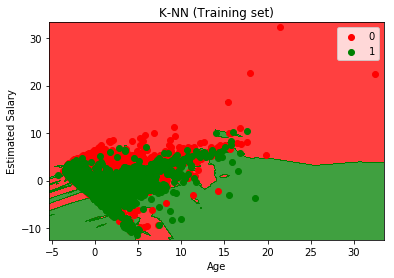

In [24]:
#Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

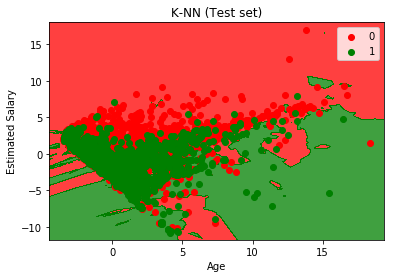

In [25]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [26]:
#Covariance Estimation 
covMat = rawData.cov()
print(covMat)

                     ID     LIMIT_BAL          SEX     EDUCATION     MARRIAGE  \
ID         7.500250e+07  2.941664e+07    78.356379    238.909130  -131.452515   
LIMIT_BAL  2.941664e+07  1.683446e+10  1571.050630 -22414.926600 -7323.669658   
SEX        7.835638e+01  1.571051e+03     0.239247      0.005289    -0.008014   
EDUCATION  2.389091e+02 -2.241493e+04     0.005289      0.553680    -0.058257   
MARRIAGE  -1.314525e+02 -7.323670e+03    -0.008014     -0.058257     0.272452   
AGE        1.491057e+03  1.730767e+05    -0.409726      1.245694    -1.992764   
PAY_0     -2.975726e+02 -3.954593e+04    -0.031685      0.095105     0.011683   
PAY_2     -1.162770e+02 -4.603765e+04    -0.041442      0.117221     0.015122   
PAY_3     -1.916922e+02 -4.443225e+04    -0.038694      0.110511     0.020421   
PAY_4     -2.769132e+01 -4.057181e+04    -0.034411      0.102618     0.020213   
PAY_5     -2.178600e+02 -3.667056e+04    -0.030521      0.089317     0.021074   
PAY_6     -2.018774e+02 -3.5

In [27]:
#Create Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [28]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [29]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[5722 1280]
 [1283  715]]


In [30]:
from sklearn.metrics import accuracy_score
# get the accuracy
print(accuracy_score(y_test, y_pred))

0.7152222222222222


In [31]:
from sklearn.metrics import cohen_kappa_score
#get kappa
print(cohen_kappa_score(y_test, y_pred))

0.17514691589266285


In [32]:
#Covariance Estimation 
covMat = rawData.cov()
print(covMat)

                     ID     LIMIT_BAL          SEX     EDUCATION     MARRIAGE  \
ID         7.500250e+07  2.941664e+07    78.356379    238.909130  -131.452515   
LIMIT_BAL  2.941664e+07  1.683446e+10  1571.050630 -22414.926600 -7323.669658   
SEX        7.835638e+01  1.571051e+03     0.239247      0.005289    -0.008014   
EDUCATION  2.389091e+02 -2.241493e+04     0.005289      0.553680    -0.058257   
MARRIAGE  -1.314525e+02 -7.323670e+03    -0.008014     -0.058257     0.272452   
AGE        1.491057e+03  1.730767e+05    -0.409726      1.245694    -1.992764   
PAY_0     -2.975726e+02 -3.954593e+04    -0.031685      0.095105     0.011683   
PAY_2     -1.162770e+02 -4.603765e+04    -0.041442      0.117221     0.015122   
PAY_3     -1.916922e+02 -4.443225e+04    -0.038694      0.110511     0.020421   
PAY_4     -2.769132e+01 -4.057181e+04    -0.034411      0.102618     0.020213   
PAY_5     -2.178600e+02 -3.667056e+04    -0.030521      0.089317     0.021074   
PAY_6     -2.018774e+02 -3.5

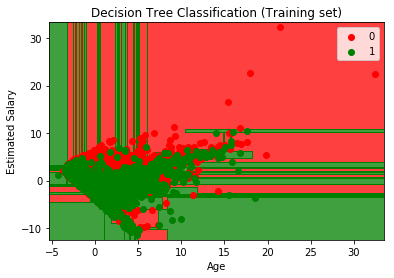

In [35]:
#Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

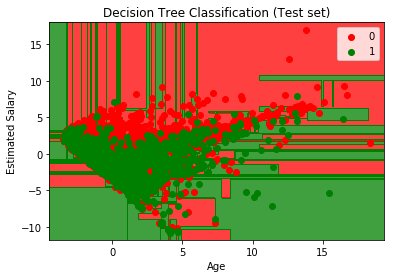

In [36]:
#Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [33]:
#Create SVM Classification to the Training set
#Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [34]:
#Predicting the Test set results
y_pred = classifier.predict(X_test)

In [35]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[7002    0]
 [1998    0]]


In [36]:
from sklearn.metrics import accuracy_score
# get the accuracy
print(accuracy_score(y_test, y_pred))

0.778


In [37]:
from sklearn.metrics import cohen_kappa_score
#get kappa
print(cohen_kappa_score(y_test, y_pred))

0.0


In [38]:
#Covariance Estimation
covMat = rawData.cov()
print(covMat)

                     ID     LIMIT_BAL          SEX     EDUCATION     MARRIAGE  \
ID         7.500250e+07  2.941664e+07    78.356379    238.909130  -131.452515   
LIMIT_BAL  2.941664e+07  1.683446e+10  1571.050630 -22414.926600 -7323.669658   
SEX        7.835638e+01  1.571051e+03     0.239247      0.005289    -0.008014   
EDUCATION  2.389091e+02 -2.241493e+04     0.005289      0.553680    -0.058257   
MARRIAGE  -1.314525e+02 -7.323670e+03    -0.008014     -0.058257     0.272452   
AGE        1.491057e+03  1.730767e+05    -0.409726      1.245694    -1.992764   
PAY_0     -2.975726e+02 -3.954593e+04    -0.031685      0.095105     0.011683   
PAY_2     -1.162770e+02 -4.603765e+04    -0.041442      0.117221     0.015122   
PAY_3     -1.916922e+02 -4.443225e+04    -0.038694      0.110511     0.020421   
PAY_4     -2.769132e+01 -4.057181e+04    -0.034411      0.102618     0.020213   
PAY_5     -2.178600e+02 -3.667056e+04    -0.030521      0.089317     0.021074   
PAY_6     -2.018774e+02 -3.5

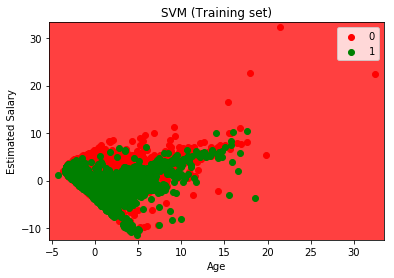

In [42]:
#Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

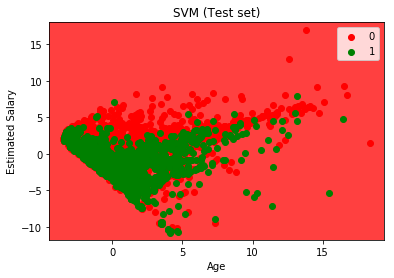

In [39]:
#Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()